In [16]:
# Here We Will Import the Most Important Libraries WE Will Need 
from bs4 import BeautifulSoup # For We Scrapping  
import requests # For Scrapping the HTML 
import numpy as np  # For Np Arrays
import pandas as pd # For Data Frames  
import re # To handle the strings
import matplotlib.pyplot as plt # For Plotting

In [3]:
# Data Scarapping And Preperation 
# Description  
# we Follow The Stpes : 
# Step 1 : WE Get the Data From the Link using Beautiful Soap to handle the HTML file  then add the content of the needed Table
# Contain the top 50 solar flares to pandas data frame and then rename the columns of the data frame 

# step 2 : we preprocessing the data frame as we drop the column called movie then we combine the date with each time (start,
# end, max) , then we shift the region column to be the last one 

# step 3: we Get the Data From Nasa Link but as the HTML Does not Contain Table Tags (Like in Step 1) we Make It As List of 
# Strings And then we Split each one and get  the columns of pandas Data Frame 

# Step 4: we Preprocess the data frame nasa_frame we get in (step 3) as that : we combine the date and time of (start, end,
# and CME ), then we make two new columns ,  first one is  is_halo to check if the CPA is Halo or not(True Or False) Then if 
# True Make the cell in The Column CPA with Nan 
# the Seocnd Column is_lower_bound to check if the width is >num (has lower bound sign) if (true) we get rid of the sign 

In [4]:
# Step 1  Scrap Competetors Data 

# Get the URL Using Requests  
req = requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares') 
# Get the Content Form The Web Page  
html_content = req.content 

# use BeautifulSoup to read And Parse the data (we will parse as html not lxml) 
# HTML Consists of Tags To Get The data  with simple Way 
soup = BeautifulSoup(html_content, 'html.parser')  

# Get The HTML In Clear View To Extract The Data we need 
Clear_Html = soup.prettify() 
# print(Clear_Html) 
# Now We Will Use Find The get the data We Need  (We Need The Table With the Top 50 Solar  flares )  
# Get the Table Content Using The Value Of the Attribute (Class) 

table = soup.find("table", attrs={"class":"table table-striped table-responsive-md"})   
# print(table) 

# This Table Contain All The Data We Need 
# Now We will Use Pandas To Get It In the Shape Of Data frame with Rows and Colums  

df = pd.read_html(str(table))[0] # The first Inedx As It always returns List and we want a data frame  

# See The Names Of The Columns 
# print(df.columns)
# Rename the Coluns Of Our Data Frame  with new Names "rank", "x_class", "date", "region", 
# "start_time", "max_time", "end_time", "movie" 
df.rename(columns={'Unnamed: 0': 'rank','Unnamed: 1': 'x_class','Unnamed: 2': 'date',
                  'Region': 'region','Start': 'start_time','Maximum': 'max_time'
                  , 'End':'end_time', 'Unnamed: 7':'movie'}, inplace=True)
print(df)

    rank x_class        date  region start_time max_time end_time  \
0      1    X28+  2003/11/04     486      19:29    19:53    20:06   
1      2    X20+  2001/04/02    9393      21:32    21:51    22:03   
2      3  X17.2+  2003/10/28     486      09:51    11:10    11:24   
3      4    X17+  2005/09/07     808      17:17    17:40    18:03   
4      5   X14.4  2001/04/15    9415      13:19    13:50    13:55   
5      6     X10  2003/10/29     486      20:37    20:49    21:01   
6      7    X9.4  1997/11/06    8100      11:49    11:55    12:01   
7      8    X9.3  2017/09/06    2673      11:53    12:02    12:10   
8      9      X9  2006/12/05     930      10:18    10:35    10:45   
9     10    X8.3  2003/11/02     486      17:03    17:25    17:39   
10    11    X8.2  2017/09/10    2673      15:35    16:06    16:31   
11    12    X7.1  2005/01/20     720      06:36    07:01    07:26   
12    13    X6.9  2011/08/09    1263      07:48    08:05    08:08   
13    14    X6.5  2006/12/06     9

In [5]:
# Step 2  Tidy  the top 50 solar flare data  
# First Dtop the Last Column in Our data Frame 
new_df = df.drop(['movie'], axis=1)  
# Now WE Will use Date Time Library 
from datetime import * 
# We Will Combine the date With time Of Start , max , end and replace it in the new data frame  



# Next : Combine Each One With the Col_date and Replace it in the Date Frame with replace
# The function iterrows get each row in Data frame With All Columns data 
for i in range(len(new_df["date"])): 
    # the index of the date is :2 
    # Start_time index is : 4
    # Max_time index is : 5
    # End_time index is : 6 
    # get value of_date 
    date_value = str(new_df.iat[i, 2])
    # update the value of each one using iat 
    # start_time
    new_df.iat[i, 4] = pd.to_datetime(date_value + "-" + str(new_df.iat[i, 4]))
    # max_time
    new_df.iat[i, 5] = pd.to_datetime(date_value + "-" + str(new_df.iat[i, 5]))
    # end_time
    new_df.iat[i, 6] = pd.to_datetime(date_value + "-" + str(new_df.iat[i, 6])) 

# print(new_df) # Just For Test  
# Next We Need To Replace The - In regionins Columns With NaN vlaue as string 
# No Regions Are Missing In This data frame  

# Shift the region to the end column 
new_df = new_df[[c for c in new_df if c not in ["region"]] + ["region"]]
print(new_df)

    rank x_class        date           start_time             max_time  \
0      1    X28+  2003/11/04  2003-11-04 19:29:00  2003-11-04 19:53:00   
1      2    X20+  2001/04/02  2001-04-02 21:32:00  2001-04-02 21:51:00   
2      3  X17.2+  2003/10/28  2003-10-28 09:51:00  2003-10-28 11:10:00   
3      4    X17+  2005/09/07  2005-09-07 17:17:00  2005-09-07 17:40:00   
4      5   X14.4  2001/04/15  2001-04-15 13:19:00  2001-04-15 13:50:00   
5      6     X10  2003/10/29  2003-10-29 20:37:00  2003-10-29 20:49:00   
6      7    X9.4  1997/11/06  1997-11-06 11:49:00  1997-11-06 11:55:00   
7      8    X9.3  2017/09/06  2017-09-06 11:53:00  2017-09-06 12:02:00   
8      9      X9  2006/12/05  2006-12-05 10:18:00  2006-12-05 10:35:00   
9     10    X8.3  2003/11/02  2003-11-02 17:03:00  2003-11-02 17:25:00   
10    11    X8.2  2017/09/10  2017-09-10 15:35:00  2017-09-10 16:06:00   
11    12    X7.1  2005/01/20  2005-01-20 06:36:00  2005-01-20 07:01:00   
12    13    X6.9  2011/08/09  2011-08-

In [6]:
# Step 3  Scrape the NASA data  
# Get the URL Using Requests  
req = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html') 
# Get the Content Form The Web Page  
html_content = req.content 
# make the beautiful soap to Handle the HTML File 
soup = BeautifulSoup(html_content, 'html.parser')   
# print(soup.text)
# If We Split the Text at \n so we will get a list  Contains Each Row Of The Table in HTML File we need  
list_html = soup.text.split('\n') 
# we need only to konw the begin of the Data We need So This Code To Get the index 
#idx = 0
#for i in list_html:
    #if i == "1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX":
        #print("yes") 
        #break
    #idx += 1
#print(idx) 
# This index is 15  
# Now We Will Loop on each Item from 15 to the end and each item split it and add to the data frame that we will make  
#for i in range(15, len(list_html - 3)): # -1 as the Last Item Contains No data To add It 
    #print(list_html[i]) 

# Make Data Frame With the Name Of The columns (Start_Date, Start_Time, End_Date, End_Time, Start_Frequency, End_Frequency
#, Flare_Location, Flare_Region, Importance, CME_Date, CME_Time, CPA) 
nasa_frame = pd.DataFrame(columns=['Start_Date','Start_Time','End_Date','End_Time','Start_Frequency','End_Frequency',
                                   'Flare_Location', 'Flare_Region', 'Importance', 'CME_Date', 'CME_Time'
                                , 'CPA', "Width", "Speed", "Plots"]) 
# loop on the content of htl Table
counter_row = -1
for i in range(15, len(list_html) - 3): 
    # Get Each Item and split it to get each one (saperable at space " ") 
    data_list = list_html[i].split(" ")  
    # print(data_list)
    # get the Exact Data We need With out Space (To Get the data Correctly)  
    exact_data = []  
    counter_col = 0 # counter Of The Data Needed 
    for i in range(len(data_list)):
        if data_list[i] == "":
            continue
        exact_data.append(data_list[i])
        counter_col += 1
    # Get nuber of years to add it to the end_date and the CME_date in nasa frame  from the start date (index[0])
    years = (exact_data[0].split("/"))[0]
    # Now We Have The Data Append It To the Data Frame  
    nasa_frame = nasa_frame.append({'Start_Date': str(exact_data[0]), 'Start_Time': str(exact_data[1]),
                                    'End_Date': years+"/"+str(exact_data[2]), 'End_Time': str(exact_data[3]), 
                                    'Start_Frequency': str(exact_data[4]), 'End_Frequency': str(exact_data[5])
                                   , 'Flare_Location': str(exact_data[6]),'Flare_Region': str(exact_data[7]),
                                   'Importance': str(exact_data[8]), 'CME_Date': years+"/"+str(exact_data[9]), 
                                   'CME_Time': str(exact_data[10]), 'CPA': str(exact_data[11]), 
                                   'Width': str(exact_data[12]), 'Speed': str(exact_data[13]), 
                                   'Plots': str(exact_data[14])}, 
                                   ignore_index=True)
print(nasa_frame) # we Now Have The Data We Need 

     Start_Date Start_Time    End_Date End_Time Start_Frequency End_Frequency  \
0    1997/04/01      14:00  1997/04/01    14:15            8000          4000   
1    1997/04/07      14:30  1997/04/07    17:30           11000          1000   
2    1997/05/12      05:15  1997/05/14    16:00           12000            80   
3    1997/05/21      20:20  1997/05/21    22:00            5000           500   
4    1997/09/23      21:53  1997/09/23    22:16            6000          2000   
5    1997/11/03      05:15  1997/11/03    12:00           14000           250   
6    1997/11/03      10:30  1997/11/03    11:30           14000          5000   
7    1997/11/04      06:00  1997/11/05    04:30           14000           100   
8    1997/11/06      12:20  1997/11/07    08:30           14000           100   
9    1997/11/27      13:30  1997/11/27    14:00           14000          7000   
10   1997/12/12      22:45  1997/12/12    23:20           14000          8000   
11   1998/01/25      15:03  

In [7]:
# Step 4  Tidy the NASA table  
# We Check here if threre is Any Nan Values in Pandas Or Not 
# print(nasa_frame.isnull().values.any())  
# the Answer Was False as there Is No Nan Values Here All Are Ready and Encoded  

# Make New Column at The Data Frame Called is_halo with initial values of CPA vlaues 
nasa_frame["is_halo"] = nasa_frame["CPA"] 
# Get the Index Of Column of 
idx_cpa =  nasa_frame.columns.get_loc("CPA")
idx_is_halo =  nasa_frame.columns.get_loc("is_halo")
# Loop On This Column using Length 
for i in range(len(nasa_frame["is_halo"])): 
    # If the Value is Not Halo then Make It False (as String)
    if nasa_frame.iat[i, idx_is_halo] != "Halo":
        nasa_frame.iat[i, idx_is_halo] = "Flase" 
    # That Means It Is Halo (True As String)
    else: 
        nasa_frame.iat[i, idx_is_halo] = "True" 
        nasa_frame.iat[i, idx_cpa] = "NaN" # Replace the Main Column CPA with None Value as string
        
        
# Create New Column Called is_lower_bound with initial Value That is the Width Column 
nasa_frame["is_lower_bound"] = nasa_frame["Width"]  
# Get the Index Of Column of 
idx_width =  nasa_frame.columns.get_loc("Width")
idx_is_lower_bound =  nasa_frame.columns.get_loc("is_lower_bound")  
for i in range(len(nasa_frame["is_lower_bound"])): 
    # get the number as string from the Cell 
    cell_value = nasa_frame.iat[i, idx_is_lower_bound] 
    # If It is Not Lower Bound Make The Value with True in the Column
    if cell_value[0] != '>': 
        nasa_frame.iat[i, idx_is_lower_bound] = "False" 
    # That Means It's True (Lower Bound)
    else:
        nasa_frame.iat[i, idx_is_lower_bound] = "True" 
        new_cell_value =  cell_value[1:] # the number with out >  
        nasa_frame.iat[i, idx_width] = new_cell_value
        
# There is problems in the End Date and the CME Date -> Some Times are 24:00 we will replace it with 00:00  
nasa_frame["End_Time"] = nasa_frame["End_Time"].replace(["24:00"], "00:00")
nasa_frame["CME_Time"] = nasa_frame["CME_Time"].replace(["24:00"], "00:00")

# Another Problem That the CME Date and Time  Has --:-- and ----/--/-- so we will do it manully    
nasa_frame["CME_DateTime"] = nasa_frame["CME_Time"] 

# Get index of the column of end_time, end_date and end_datetime 
idx_time = nasa_frame.columns.get_loc("CME_Time")
idx_date = nasa_frame.columns.get_loc("CME_Date")
idx_date_time = nasa_frame.columns.get_loc("CME_DateTime")
for i in range(len(nasa_frame["CME_Time"]) - 1):
    # First Get the date years-months-days 
    get_date_data = str(nasa_frame.iat[i, idx_date]).split("/") 
    # make the value as  years-mohts-days HH:MM
    time_date = str(nasa_frame.iat[i, idx_time])
    column_value = get_date_data[0] + "-" + get_date_data[1] + "-" + get_date_data[2]+ " " + time_date + ":00"
    nasa_frame.iat[i, idx_date_time] = column_value

# Now We Need To Combine Date and Time of (start, end, and CME ) with respect to date time type 
nasa_frame["Start_DateTime"] = pd.to_datetime(nasa_frame["Start_Date"] + "-" + nasa_frame["Start_Time"]) 
nasa_frame["End_DateTime"] = pd.to_datetime(nasa_frame["End_Date"] + "-" + nasa_frame["End_Time"])  


    
# Then Drop the colums Of All Start , end, And CME DAte and Time (No Need Any More) 
nasa_frame.drop(['Start_Date', 'Start_Time', 'End_Date', 'End_Time', 'CME_Date', 'CME_Time'], axis=1, inplace=True) 
print(nasa_frame)


    Start_Frequency End_Frequency Flare_Location Flare_Region Importance  \
0              8000          4000         S25E16         8026       M1.3   
1             11000          1000         S28E19         8027       C6.8   
2             12000            80         N21W08         8038       C1.3   
3              5000           500         N05W12         8040       M1.3   
4              6000          2000         S29E25         8088       C1.4   
5             14000           250         S20W13         8100       C8.6   
6             14000          5000         S16W21         8100       M4.2   
7             14000           100         S14W33         8100       X2.1   
8             14000           100         S18W63         8100       X9.4   
9             14000          7000         N17E63         8113       X2.6   
10            14000          8000         N25W52         8116       B9.4   
11            14000         10000         N21E25         8141       C1.1   
12          

In [9]:
# Step 2 In the Project the Analysis 
# Answer For The Three Questions
# question 1 : No as 
# In the First Data Frame We have the DAta of 50 the second one we will take the top 50 and check if all the Importance is 
# Xor not and not all Contains That X   

In [12]:

best_matching = pd.DataFrame(columns=new_df.columns)
rank = []

for index_second, row_second in nasa_frame.iterrows():
    for index_first, row_first in new_df.iterrows():
        flag = False
        class_imp = str(row_first['x_class'])
        if '+' in class_imp:
            class_imp = class_imp[:-1]
        
        number_1_data = re.split('-| ',str(row_first['start_time']))
        number_1_data = data_1[0:3]
        
        number_2_data = re.split('/| ',str(row_second['Start_DateTime']))
        number_2_data = data_2[0:3]
        
      
        
        if row_second['Importance'] == class_imp and data_2 == data_1:
            best_matching.loc[len(best_matching)] = nasa_frame.loc[index_second].tolist()
            flag = True
    if flag == True:
        rank.append("Ture")
    else:
        rank.append("False")
nasa_frame['rank'] = rank



print(best_matching)

Empty DataFrame
Columns: [rank, x_class, date, start_time, max_time, end_time, region]
Index: []


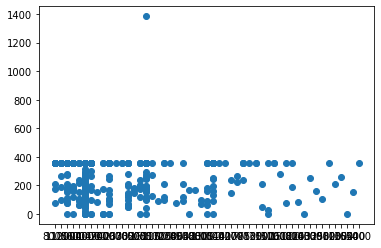

In [19]:


start_Frequancy = nasa_frame['Start_Frequency'].tolist()
plt.scatter(start_Frequancy, width, label='Start Frequancy vs width')
plt.show()